In [ ]:
# Import all necessary librarues
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE445/D1_healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

(5893, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5893 entries, 0 to 5892
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5893 non-null   int64  
 1   gender             5893 non-null   object 
 2   age                5893 non-null   float64
 3   hypertension       5893 non-null   int64  
 4   heart_disease      5893 non-null   int64  
 5   ever_married       5893 non-null   object 
 6   work_type          5893 non-null   object 
 7   Residence_type     5893 non-null   object 
 8   avg_glucose_level  5893 non-null   float64
 9   bmi                5552 non-null   float64
 10  smoking_status     5748 non-null   object 
 11  stroke             5893 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 552.6+ KB


# **Null Value check**

In [ ]:
# Check for missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  341
smoking_status       145
stroke                 0
dtype: int64

In [ ]:
# We can see that there are 261 missing values in the 'bmi' column
# Dealing with missing values
# Fill the missing values in the 'bmi' column with the mean value

mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

df['smoking_status'].fillna('Unknown', inplace=True)

In [ ]:
# Check Null values again.
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Drop 'id' column if it exists

df.drop('id', axis=1, inplace=True, errors='ignore')

<ipython-input-11-8239e04bb62f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


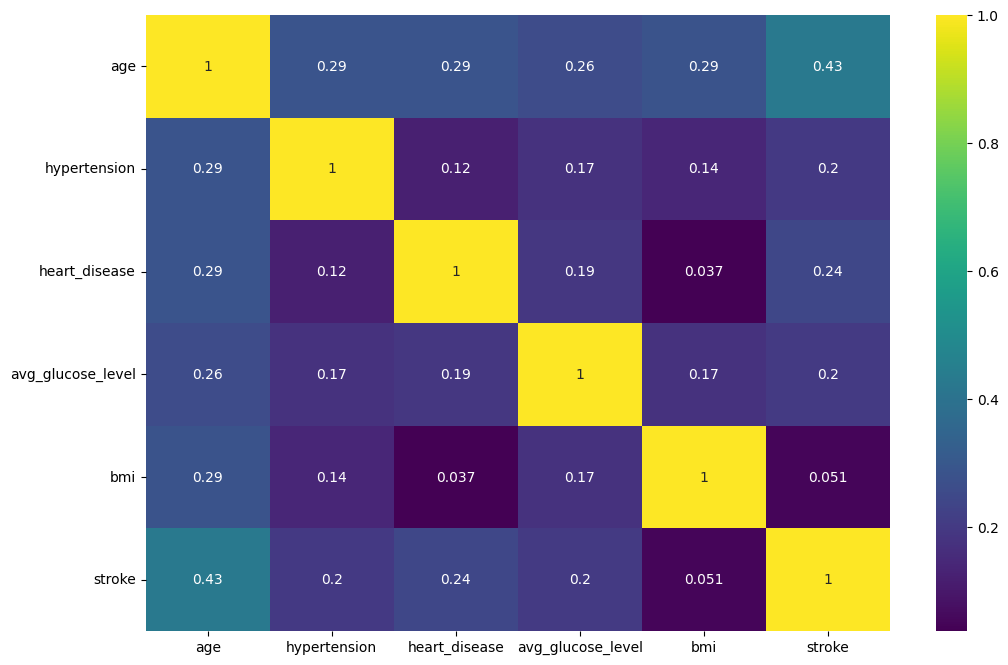

In [ ]:
# Correlation Matrix

corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

<Axes: xlabel='stroke', ylabel='count'>

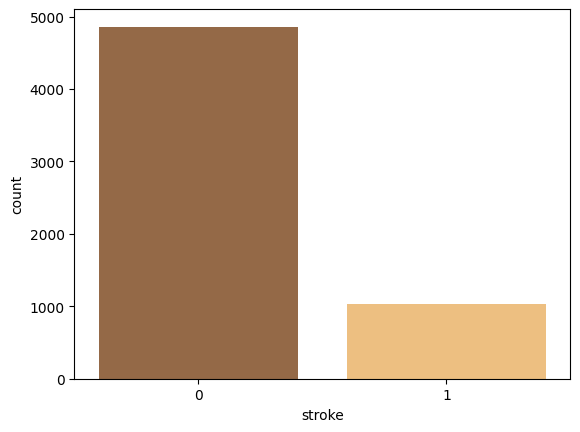

In [ ]:
# Plot Target variable distribution in Seaborn

import seaborn as sns
custom_palette = ["#A1683A", "#FFC26F"]

sns.countplot(x='stroke', data=df, palette=custom_palette)

# **Histogram for the Numerical Data**

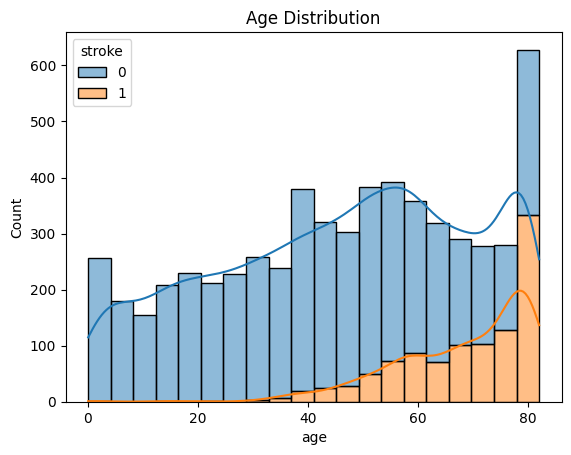

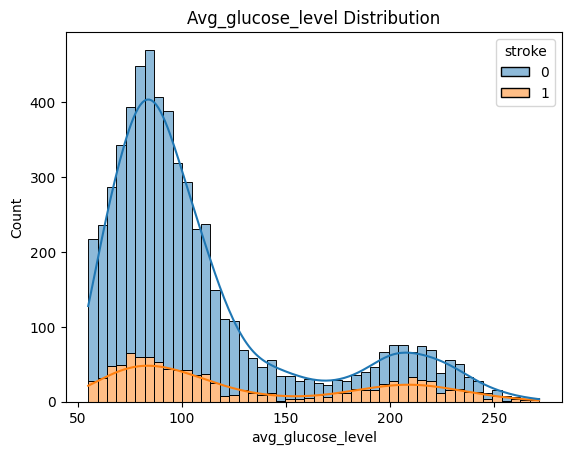

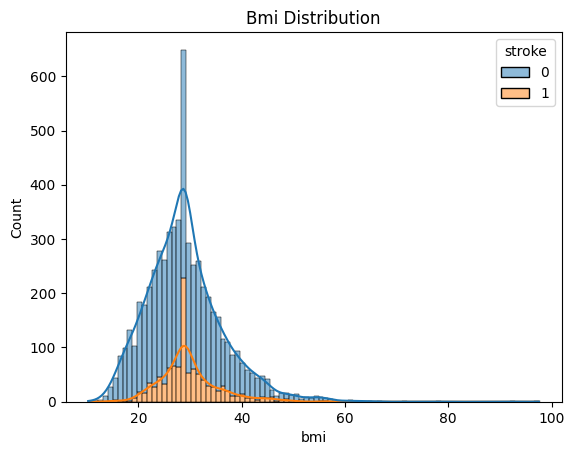

In [ ]:

num_features = ['age', 'avg_glucose_level', 'bmi']
for feature in num_features:
    plt.figure()
    sns.histplot(data=df, x=feature, hue='stroke', kde=True, multiple='stack')
    plt.title(feature.capitalize() + ' Distribution')
    plt.show()

# **Bar Chart for Categorical Data**

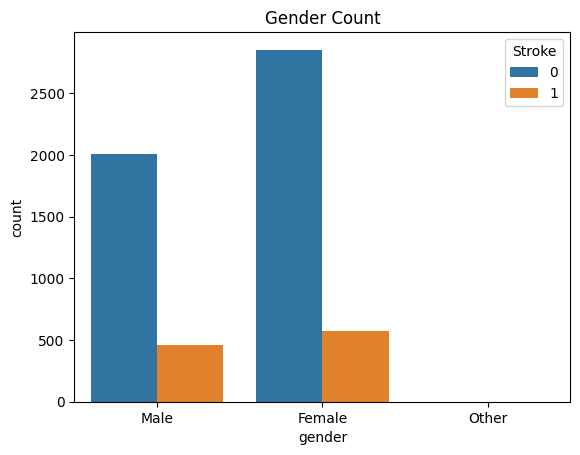

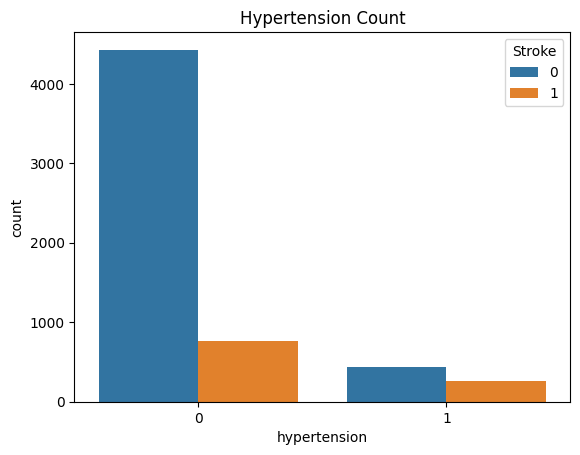

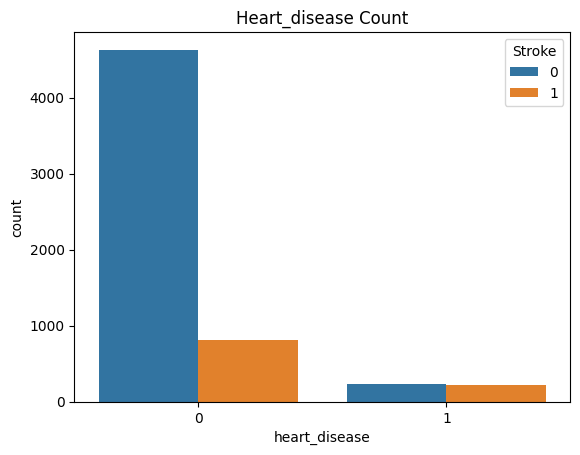

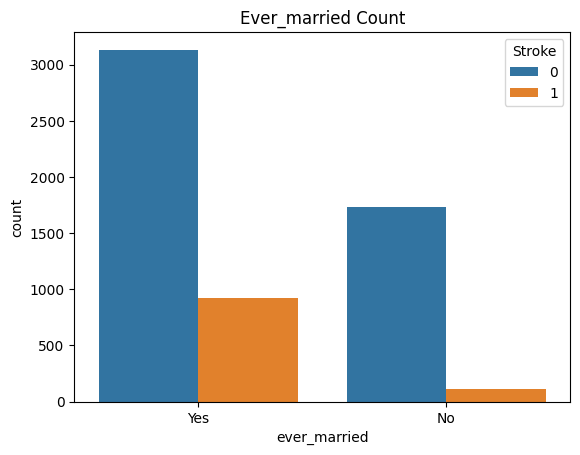

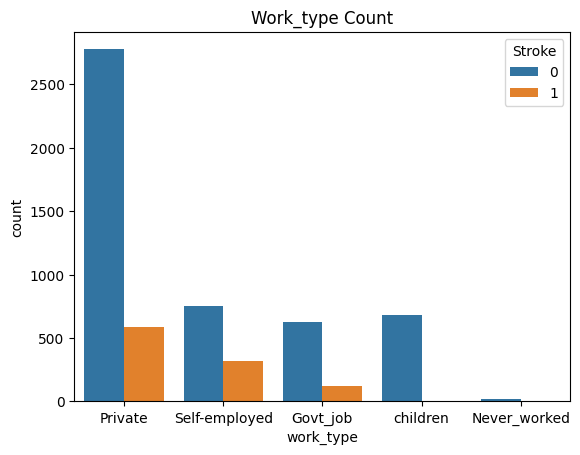

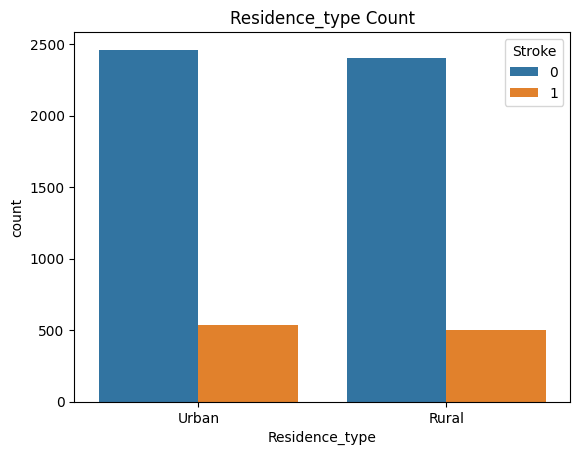

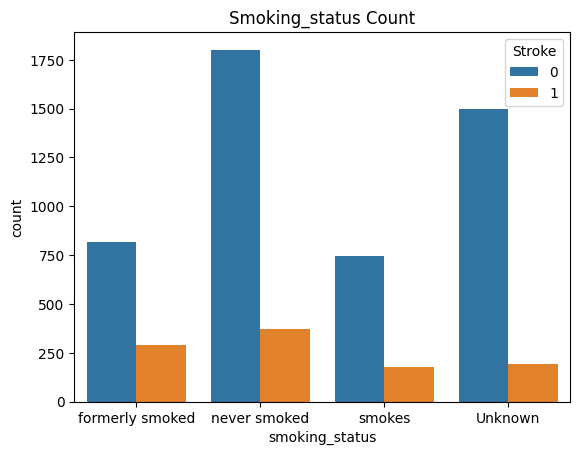

In [ ]:

import seaborn as sns

cat_features = ['gender',	'hypertension',	'heart_disease',	'ever_married',	'work_type',	'Residence_type',	'smoking_status']
for feature in cat_features:
    plt.figure()
    sns.countplot(data=df, x=feature, hue='stroke')
    plt.title(feature.capitalize() + ' Count')
    plt.legend(title='Stroke', loc='upper right')
    plt.show()

### **Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply normalization and standardization for numerical features

num_features = ['age', 'avg_glucose_level', 'bmi']

# Apply Min-Max scaling (normalization) to numerical features
scaler_minmax = MinMaxScaler()
df[num_features] = scaler_minmax.fit_transform(df[num_features])
print('\n\n Data after Min-Max scaling:\n\n')
df.head()



 Data after Min-Max scaling:




,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0.816895,0,1,Yes,Private,Urban,0.801366,0.301260,formerly smoked,1
1,Female,0.743652,0,0,Yes,Self-employed,Rural,0.679186,0.214274,never smoked,1
2,Male,0.975586,0,1,Yes,Private,Rural,0.234901,0.254296,never smoked,1
3,Female,0.597168,0,0,Yes,Private,Urban,0.536243,0.276060,smokes,1
4,Female,0.963379,1,0,Yes,Self-employed,Rural,0.549578,0.156930,never smoked,1


**Label Encoder**

In [ ]:
# Encode the class labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['ever_married'] = encoder.fit_transform(df['ever_married'])
df['work_type'] = encoder.fit_transform(df['work_type'])
df['Residence_type'] = encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,2,1,0.801366,0.301260,1,1
1,0,0.743652,0,0,1,3,0,0.679186,0.214274,2,1
2,1,0.975586,0,1,1,2,0,0.234901,0.254296,2,1
3,0,0.597168,0,0,1,2,1,0.536243,0.276060,3,1
4,0,0.963379,1,0,1,3,0,0.549578,0.156930,2,1


# **Oversamping (SMOTE)**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Split the dataset into X and y
X = df.drop(['stroke'], axis=1)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE technique
smt = SMOTE(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)
print('\n\nAfter SMOTE technique:\n\n', y_resampled.value_counts())

# # Create a new DataFrame with resampled data
df_smote = pd.DataFrame(X_resampled, columns=X.columns)
df_smote['stroke'] = y_resampled

# Apply Random Over Sampling technique
ros = RandomOverSampler(random_state=42)
X_resampled2, y_resampled2 = ros.fit_resample(X_resampled, y_resampled)
print('\n\nAfter Random Over Sampling:\n\n', y_resampled2.value_counts())

# # Create a new DataFrame with resampled data
df_ros = pd.DataFrame(X_resampled2, columns=X.columns)
df_ros['stroke'] = y_resampled2

df = pd.concat([df_smote, df_ros])



After SMOTE technique:

 0    3910
1    3910
Name: stroke, dtype: int64


After Random Over Sampling:

 0    3910
1    3910
Name: stroke, dtype: int64


# **Machine Learning Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
kneighbors_classifier = KNeighborsClassifier()
naive_bayes = GaussianNB()
svm = SVC()
gradient_boosting = GradientBoostingClassifier()


# Train the models
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
kneighbors_classifier.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
svm.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)


# Make predictions on the test set
lr_predictions = logistic_regression.predict(X_test)
dt_predictions = decision_tree.predict(X_test)
rf_predictions = random_forest.predict(X_test)
kc_predictions = kneighbors_classifier.predict(X_test)
nb_y_pred = naive_bayes.predict(X_test)
svm_y_pred = svm.predict(X_test)
gb_y_pred = gradient_boosting.predict(X_test)


In [ ]:
# Evaluate model performance

lr_accuracy1 = logistic_regression.score(X_train, y_train)
lr_accuracy2 = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

dt_accuracy1 = decision_tree.score(X_train, y_train)
dt_accuracy2 = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

rf_accuracy1 = random_forest.score(X_train, y_train)
rf_accuracy2 = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

kc_accuracy1 = kneighbors_classifier.score(X_train, y_train)
kc_accuracy2 = accuracy_score(y_test, kc_predictions)
kc_precision = precision_score(y_test, kc_predictions)
kc_recall = recall_score(y_test, kc_predictions)
kc_f1 = f1_score(y_test, kc_predictions)

nb_accuracy1 = naive_bayes.score(X_train, y_train)
nb_accuracy2 = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred)
nb_recall = recall_score(y_test, nb_y_pred)
nb_f1 = f1_score(y_test, nb_y_pred)

svm_accuracy1 = svm.score(X_train, y_train)
svm_accuracy2 = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)

gb_accuracy1 = gradient_boosting.score(X_train, y_train)
gb_accuracy2 = accuracy_score(y_test, gb_y_pred)
gb_precision = precision_score(y_test, gb_y_pred)
gb_recall = recall_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred)


# Print the evaluation metrics
print("Logistic Regression:")
print("Training Accuracy:", lr_accuracy1)
print("Testing Accuracy:", lr_accuracy2)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)

print("\n\nDecision Tree:")
print("Training Accuracy:", dt_accuracy1)
print("Testing Accuracy:", dt_accuracy2)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)

print("\n\nRandom Forest:")
print("Training Accuracy:", rf_accuracy1)
print("Testing Accuracy:", rf_accuracy2)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

print("\n\nK Neighbors Classifier:")
print("Training Accuracy:", kc_accuracy1)
print("Testing Accuracy:", kc_accuracy2)
print("Precision:", kc_precision)
print("Recall:", kc_recall)
print("F1 Score:", kc_f1)

print('\n\nNaive Bayes Results:')
print("Training Accuracy:", nb_accuracy1)
print("Testing Accuracy:", nb_accuracy2)
print('Precision:', nb_precision)
print('Recall:', nb_recall)
print('F1-score:', nb_f1)
print('\n')

print('SVM Results:')
print("Training Accuracy:", svm_accuracy1)
print("Testing Accuracy:", svm_accuracy2)
print('Precision:', svm_precision)
print('Recall:', svm_recall)
print('F1-score:', svm_f1)
print('\n')

print('Gradient Boosting Results:')
print("Training Accuracy:", gb_accuracy1)
print("Testing Accuracy:", gb_accuracy2)
print('Precision:', gb_precision)
print('Recall:', gb_recall)
print('F1-score:', gb_f1)
print('\n')

Logistic Regression:
Training Accuracy: 0.833474756045821
Testing Accuracy: 0.8278201865988125
Precision: 0.6506024096385542
Recall: 0.23684210526315788
F1 Score: 0.3472668810289389


Decision Tree:
Training Accuracy: 1.0
Testing Accuracy: 0.833757421543681
Precision: 0.5661157024793388
Recall: 0.6008771929824561
F1 Score: 0.5829787234042553


Random Forest:
Training Accuracy: 1.0
Testing Accuracy: 0.8744698897370653
Precision: 0.7531645569620253
Recall: 0.5219298245614035
F1 Score: 0.616580310880829


K Neighbors Classifier:
Training Accuracy: 0.8744166313109886
Testing Accuracy: 0.8006785411365565
Precision: 0.475177304964539
Recall: 0.29385964912280704
F1 Score: 0.3631436314363144


Naive Bayes Results:
Training Accuracy: 0.795290623674162
Testing Accuracy: 0.7888040712468194
Precision: 0.4591439688715953
Recall: 0.5175438596491229
F1-score: 0.48659793814432994


SVM Results:
Training Accuracy: 0.8305048790835808
Testing Accuracy: 0.8074639525021204
Precision: 0.6
Recall: 0.01315789

**Confusion Matrix**

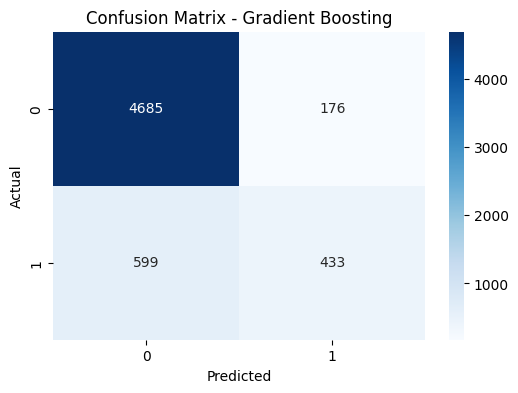

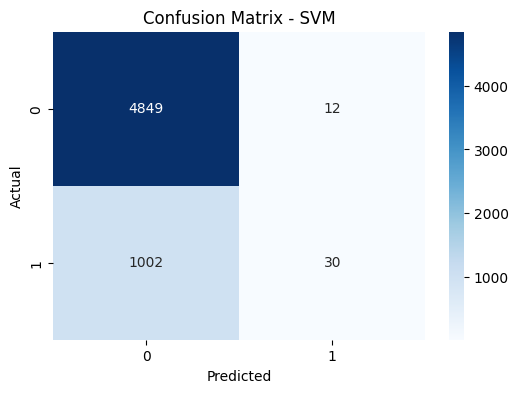

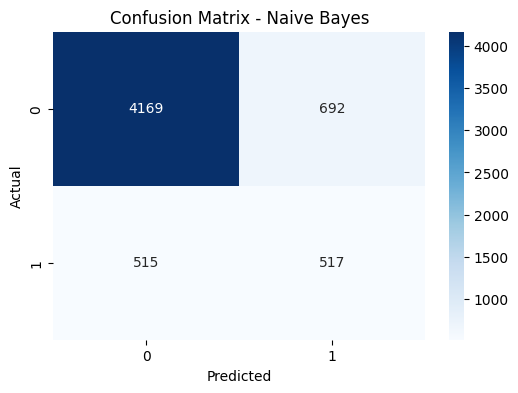

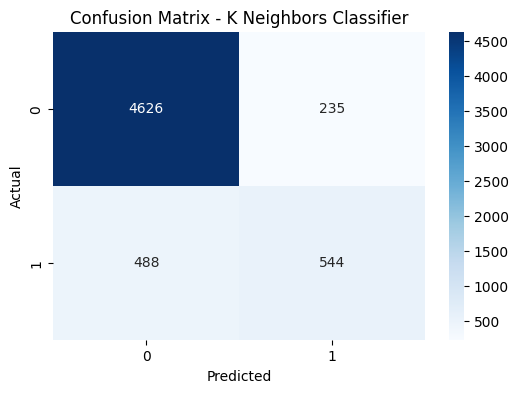

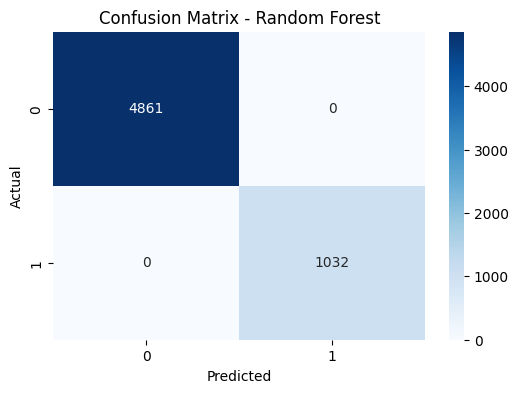

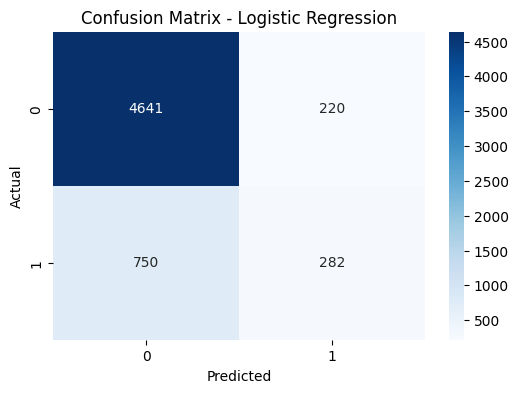

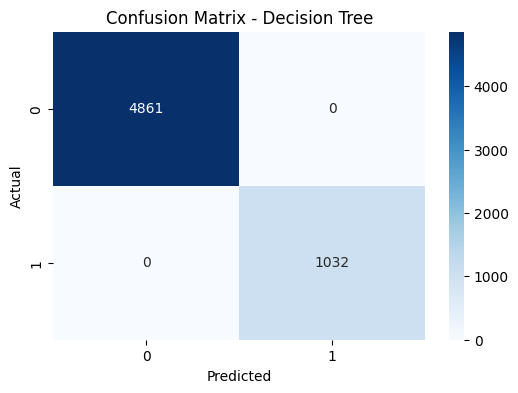

In [ ]:
from sklearn.metrics import confusion_matrix

# Initialize the classifiers
classifiers = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('SVM', SVC()),
    ('Naive Bayes', GaussianNB()),
    ('K Neighbors Classifier', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Create a colorful table for the confusion matrix
for name, classifier in classifiers:
    classifier.fit(X, y)
    y_pred = classifier.predict(X)
    cm = confusion_matrix(y, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# **Explainable AI (SHAP)**

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 9.6 MB/s eta 0:00:00


In [ ]:
from shap import TreeExplainer
import matplotlib.pyplot as plt
import shap

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = TreeExplainer(decision_tree)

"""
Compute shap_values for all of X_test rather instead of
a single row, to have more data for plot.
"""
shap_values = explainer.shap_values(X_train)

Variable Importance Plot - Global Interpretation


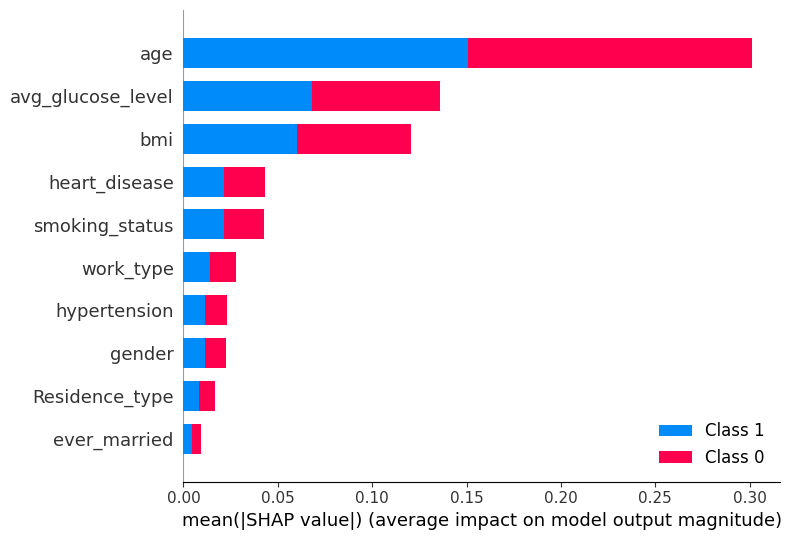

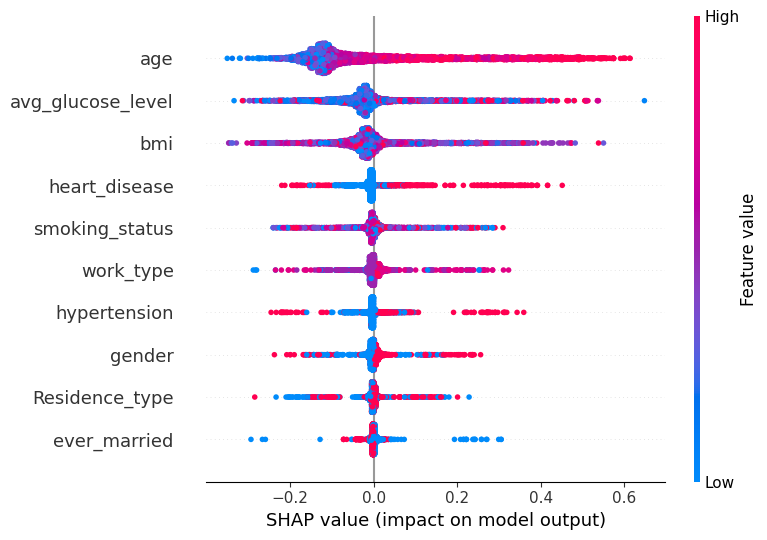

In [ ]:
feature_names = X_train.columns

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_train, feature_names=feature_names)

# Summary Plot Deep-Dive on Label 1
shap.summary_plot(shap_values[1], X_train, feature_names=feature_names)